**REGRESIÓN LINEAL**

La regresión lineal es una técnica estadística que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes. El objetivo de la regresión lineal es encontrar una línea recta que mejor represente la relación entre estas variables.

**Regresión lineal simple:** Este tipo de regresión lineal involucra solo dos variables, una variable independiente y una variable dependiente. La relación entre las dos variables se modela mediante una línea recta.

Supongamos que se tiene un conjunto de datos que muestra la cantidad de tiempo que los estudiantes pasan estudiando y sus calificaciones en un examen. El objetivo es determinar si hay una relación lineal entre el tiempo de estudio y las calificaciones, y si es así, utilizar la regresión lineal para predecir las calificaciones de un estudiante en función del tiempo que pasan estudiando.

Primero, se deben importar las bibliotecas necesarias y cargar los datos en un DataFrame de Pandas:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# cargar los datos

datos = {
    'Tiempo': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
               2, 1, 2, 1, 2, 1, 5, 6, 2, 3,
               10,10,11,12,15,16,17,18,16,20,
               1, 2, 3, 4, 5, 6, 8, 9, 7, 1,
               10,19,13,15,16,14,25,24,23,19,
               11,12,15,14,16,13,15,12,12,20],
    'Calificación': [60, 70, 75, 80, 85, 90, 92, 94, 96, 98,
                     60, 50, 20, 50, 20, 60, 60, 30, 30, 15,
                     75, 82, 87, 91, 78, 89, 94, 81, 76, 93,
                     23, 34, 45, 18, 50, 29, 12, 56, 37, 41,
                     89, 93, 82, 87, 91, 95, 84, 88, 83, 90,
                     81, 94, 86, 85, 97, 92, 98, 80, 96, 99]
}

data = pd.DataFrame(datos)

data.to_csv("datos_estudiantes.csv", index=False)
# visualizar los primeros registros
print(data)

    Tiempo  Calificación
0        1            60
1        2            70
2        3            75
3        4            80
4        5            85
5        6            90
6        7            92
7        8            94
8        9            96
9       10            98
10       2            60
11       1            50
12       2            20
13       1            50
14       2            20
15       1            60
16       5            60
17       6            30
18       2            30
19       3            15
20      10            75
21      10            82
22      11            87
23      12            91
24      15            78
25      16            89
26      17            94
27      18            81
28      16            76
29      20            93
30       1            23
31       2            34
32       3            45
33       4            18
34       5            50
35       6            29
36       8            12
37       9            56
38       7            37


El archivo "datos_estudiantes.csv" contiene los datos de 10 estudiantes, que se presentan en la siguiente tabla:

Ahora se van a agregar 50 datos más a la lista

In [7]:
import pandas as pd
import glob

# Rutas donde se encuentran los archivos CSV
ruta_archivos = [
    '/content/Datos_Estudiantes_Maicol Lojano.csv',
    '/content/danny datos_estudiantes.csv',
    '/content/datos_estudiantes (1).csv',
    '/content/datos_estudiantes_Ariel_Saquicela.csv',
    '/content/datos_estudiantes_Carlos Astudillo.csv',
    '/content/datos_estudiantes_Jonnathan.csv',
    '/content/datos_estudiantes_Jose_munoz.csv',
    '/content/datos_estudiantes_Paul Rodriguez.csv',
    '/content/datos_estudiantes_paula_gomez.csv',
    '/content/datos_estudiantes_victorcab.csv'
]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Leer cada archivo CSV y almacenarlo en la lista de DataFrames
for archivo in ruta_archivos:
    # Leer el archivo CSV
    df = pd.read_csv(archivo)

    # Verificar si las columnas 'Tiempo' y 'Calificación' están presentes
    if 'Tiempo' in df.columns and 'Calificación' in df.columns:
        # Seleccionar solo las columnas 'Tiempo' y 'Calificación'
        df = df[['Tiempo', 'Calificación']]

        # Agregar el DataFrame filtrado a la lista
        dfs.append(df)
    else:
        print(f"El archivo {archivo} no tiene las columnas 'Tiempo' y 'Calificación'.")

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dfs, ignore_index=True)

# Mostrar las primeras filas del DataFrame final para verificar
print(df_final.head())

# Guardar el DataFrame final en un archivo CSV
df_final.to_csv('/content/datos_completos.csv', index=False)

# Mensaje de confirmación
print("Se ha creado el archivo 'datos_completos.csv' con la información combinada de todos los archivos CSV.")


   Tiempo  Calificación
0       1            60
1       2            70
2       3            75
3       4            80
4       5            85
Se ha creado el archivo 'datos_completos.csv' con la información combinada de todos los archivos CSV.


In [10]:
df=pd.read_csv('/content/datos_completos.csv')
df

,Tiempo,Calificación
0,1,60
1,2,70
2,3,75
3,4,80
4,5,85
...,...,...
596,6,4
597,7,42
598,8,44
599,9,46


A continuación, se deben separar las variables independientes (horas de estudio) de la variable dependiente (calificacion):

In [11]:
# separar las variables independientes y dependiente
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [12]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [ 2],
       [ 1],
       [ 2],
       [ 1],
       [ 2],
       [ 1],
       [ 5],
       [ 6],
       [ 2],
       [ 3],
       [10],
       [10],
       [11],
       [12],
       [15],
       [16],
       [17],
       [18],
       [16],
       [20],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 8],
       [ 9],
       [ 7],
       [ 1],
       [10],
       [19],
       [13],
       [15],
       [16],
       [14],
       [25],
       [24],
       [23],
       [19],
       [11],
       [12],
       [15],
       [14],
       [16],
       [13],
       [15],
       [12],
       [12],
       [20]])

In [13]:
y

array([60, 70, 75, 80, 85, 90, 92, 94, 96, 98, 60, 50, 20, 50, 20, 60, 60,
       30, 30, 15, 75, 82, 87, 91, 78, 89, 94, 81, 76, 93, 23, 34, 45, 18,
       50, 29, 12, 56, 37, 41, 89, 93, 82, 87, 91, 95, 84, 88, 83, 90, 81,
       94, 86, 85, 97, 92, 98, 80, 96, 99])

Luego, se puede ajustar la línea de regresión utilizando el modelo de regresión lineal de Scikit-learn:

In [14]:
# ajustar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

Finalmente, se puede visualizar la línea de regresión y predecir la calificación del estudiante en función de las horas que estudia:

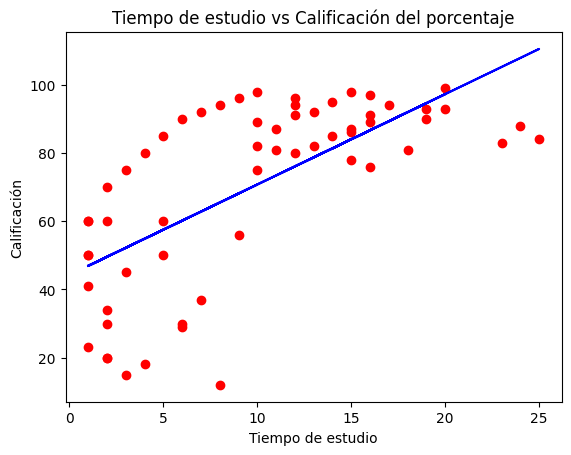

Calificación predicha: [65.45303667]


In [15]:
# visualizar la línea de regresión
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Tiempo de estudio vs Calificación del porcentaje')
plt.xlabel('Tiempo de estudio')
plt.ylabel('Calificación')
plt.show()

# predecir la calificación de un estudiante que invierte 6 horas de studio
horas_estudio = [[8]]
print("Calificación predicha:", regressor.predict(horas_estudio))

**EVALUACIÓN DEL MODELO**

Para evaluar la calidad de un modelo de regresión lineal, hay varias métricas que se pueden utilizar. Aquí se presentan algunas de las más comunes:

**1. Error cuadrático medio (MSE):** Esta métrica calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo.

In [19]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)


MSE: 376.535114946558


**2. Coeficiente de determinación (R2):** Esta métrica mide la proporción de la varianza en la variable dependiente que se puede explicar por la variable independiente. Un R2 más alto indica un mejor ajuste del modelo.

In [20]:
from sklearn.metrics import r2_score

# calcular el R2
r2 = r2_score(y, y_pred)
print("R2:", r2)

R2: 0.4483235492646591


**3. Gráfico de residuos:** Un gráfico de residuos muestra la diferencia entre los valores reales y las predicciones en función de las variables independientes. Si las predicciones son precisas, los residuos deberían estar distribuidos aleatoriamente alrededor de cero. Si hay un patrón en los residuos, puede ser una indicación de que el modelo no está capturando completamente las relaciones entre las variables.

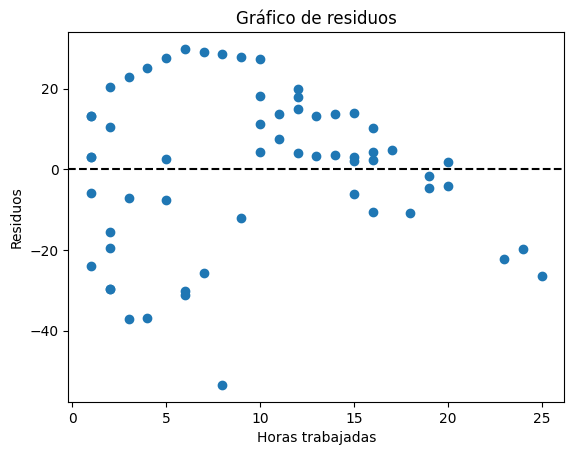

In [18]:
# crear un gráfico de residuos
residuos = y - y_pred
plt.scatter(X, residuos)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Horas trabajadas')
plt.ylabel('Residuos')

plt.show()

Estas métricas pueden ayudar a evaluar la calidad de un modelo de regresión lineal y determinar si es adecuado para el conjunto de datos y el problema en cuestión. Es importante tener en cuenta que ninguna métrica por sí sola puede decir si un modelo es adecuado, por lo que se deben considerar varias métricas en conjunto.